## The Setup

Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn import grid_search
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing


C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Prepping and Exploring the Data


In [29]:
house = pd.read_csv('housing.csv')

In [30]:
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [31]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Data columns (total 21 columns):
Suburb           31420 non-null object
Address          31420 non-null object
Rooms            31420 non-null int64
Type             31420 non-null object
Price            24589 non-null float64
Method           31420 non-null object
SellerG          31420 non-null object
Date             31420 non-null object
Distance         31419 non-null float64
Postcode         31419 non-null float64
Bedroom2         24211 non-null float64
Bathroom         24205 non-null float64
Car              23821 non-null float64
Landsize         20621 non-null float64
BuildingArea     12569 non-null float64
YearBuilt        14294 non-null float64
CouncilArea      31417 non-null object
Lattitude        24434 non-null float64
Longtitude       24434 non-null float64
Regionname       31417 non-null object
Propertycount    31417 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.0+ M

In [32]:
#check for nulls
print(house.isnull().sum())

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6831
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7209
Bathroom          7215
Car               7599
Landsize         10799
BuildingArea     18851
YearBuilt        17126
CouncilArea          3
Lattitude         6986
Longtitude        6986
Regionname           3
Propertycount        3
dtype: int64


In [33]:
for col in house.columns: 
    print('There are {} unique values for {}'.format((len(house[col].unique())),col))

There are 348 unique values for Suburb
There are 30718 unique values for Address
There are 12 unique values for Rooms
There are 3 unique values for Type
There are 2761 unique values for Price
There are 9 unique values for Method
There are 374 unique values for SellerG
There are 73 unique values for Date
There are 215 unique values for Distance
There are 210 unique values for Postcode
There are 16 unique values for Bedroom2
There are 12 unique values for Bathroom
There are 15 unique values for Car
There are 1642 unique values for Landsize
There are 727 unique values for BuildingArea
There are 158 unique values for YearBuilt
There are 34 unique values for CouncilArea
There are 11801 unique values for Lattitude
There are 12860 unique values for Longtitude
There are 9 unique values for Regionname
There are 341 unique values for Propertycount


OK, since we are trying to predict value, we likely need the price for the house not to be null. 
So we should remove those rows. 


In [34]:
#Eliminate the rows that have no info regarding price
house = house.dropna(subset=['Price'], how='any')


In [35]:
house2 = house.drop(['Bedroom2','Address','SellerG','Suburb', 'Date','Regionname','CouncilArea','Postcode'],1)


In [36]:
house2 = house2.drop(['BuildingArea'],1)

In [37]:
house3 = house2.dropna()
house3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9530 entries, 2 to 31413
Data columns (total 12 columns):
Rooms            9530 non-null int64
Type             9530 non-null object
Price            9530 non-null float64
Method           9530 non-null object
Distance         9530 non-null float64
Bathroom         9530 non-null float64
Car              9530 non-null float64
Landsize         9530 non-null float64
YearBuilt        9530 non-null float64
Lattitude        9530 non-null float64
Longtitude       9530 non-null float64
Propertycount    9530 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 967.9+ KB


In [38]:
house3.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount
count,9530.000000,9.530000e+03,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000
mean,3.017524,1.073370e+06,10.756905,1.608919,1.647219,517.728332,1965.561805,-37.807176,144.993400,7477.704617
std,0.982055,6.718517e+05,6.558529,0.713823,0.964582,1049.525322,36.686900,0.086795,0.112987,4370.553783
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,290.000000
25%,2.000000,6.300000e+05,6.300000,1.000000,1.000000,184.000000,1949.000000,-37.857800,144.925215,4385.000000
50%,3.000000,8.820000e+05,9.700000,1.000000,2.000000,448.000000,1970.000000,-37.802000,144.999055,6567.000000
75%,4.000000,1.320000e+06,13.700000,2.000000,2.000000,651.000000,1999.000000,-37.752800,145.061275,10331.000000
max,12.000000,9.000000e+06,47.400000,9.000000,10.000000,40469.000000,2018.000000,-37.407200,145.526350,21650.000000


OK, but now there is the issue of the remaining null items. We likely will want to use some of these, as they could have predictive power, but I don't want to replace them with 0. That would make no sense. 

However, I am skeptical about removing all of them, as that would only leave us with as many rows as there is data for Building area, which after taking a look at, seems to not be entirely accurate (building area of 1?).


I am going to do some imputation, using median


In [39]:
# #Drop the Nan values that are in the Regionname and CouncilArea columns and 
# #Fill the missing values with the median of each column
# house2 =house.dropna(subset=[['Regionname','CouncilArea']])
# house3 = house2.fillna(house2.median())
# house3.info()

In [40]:
house3.head()

,Rooms,Type,Price,Method,Distance,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,h,1035000.0,S,2.5,1.0,0.0,156.0,1900.0,-37.8079,144.9934,4019.0
4,3,h,1465000.0,SP,2.5,2.0,0.0,134.0,1900.0,-37.8093,144.9944,4019.0
6,4,h,1600000.0,VB,2.5,1.0,2.0,120.0,2014.0,-37.8072,144.9941,4019.0
11,3,h,1876000.0,S,2.5,2.0,0.0,245.0,1910.0,-37.8024,144.9993,4019.0
14,2,h,1636000.0,S,2.5,1.0,2.0,256.0,1890.0,-37.8060,144.9954,4019.0


In [41]:
house3 = house3.loc[((house3['Car'] < house3['Rooms']) & (house3['Car'] >=2 ))| (house3['Car'] <2), :]



In [42]:
house3.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount
count,8455.000000,8.455000e+03,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000
mean,3.049911,1.076179e+06,10.661644,1.625310,1.450976,489.560142,1965.713779,-37.807684,144.994818,7480.447546
std,0.998280,6.768602e+05,6.507412,0.717732,0.709981,777.294062,36.528964,0.085966,0.112282,4342.195880
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174360,144.423790,389.000000
25%,2.000000,6.225000e+05,6.200000,1.000000,1.000000,176.000000,1945.000000,-37.858100,144.927215,4442.000000
50%,3.000000,8.860000e+05,9.700000,2.000000,1.000000,422.000000,1970.000000,-37.802900,144.999670,6567.000000
75%,4.000000,1.330000e+06,13.700000,2.000000,2.000000,648.000000,2000.000000,-37.754900,145.062425,10331.000000
max,12.000000,9.000000e+06,47.300000,9.000000,5.000000,21600.000000,2017.000000,-37.407200,145.482730,21650.000000


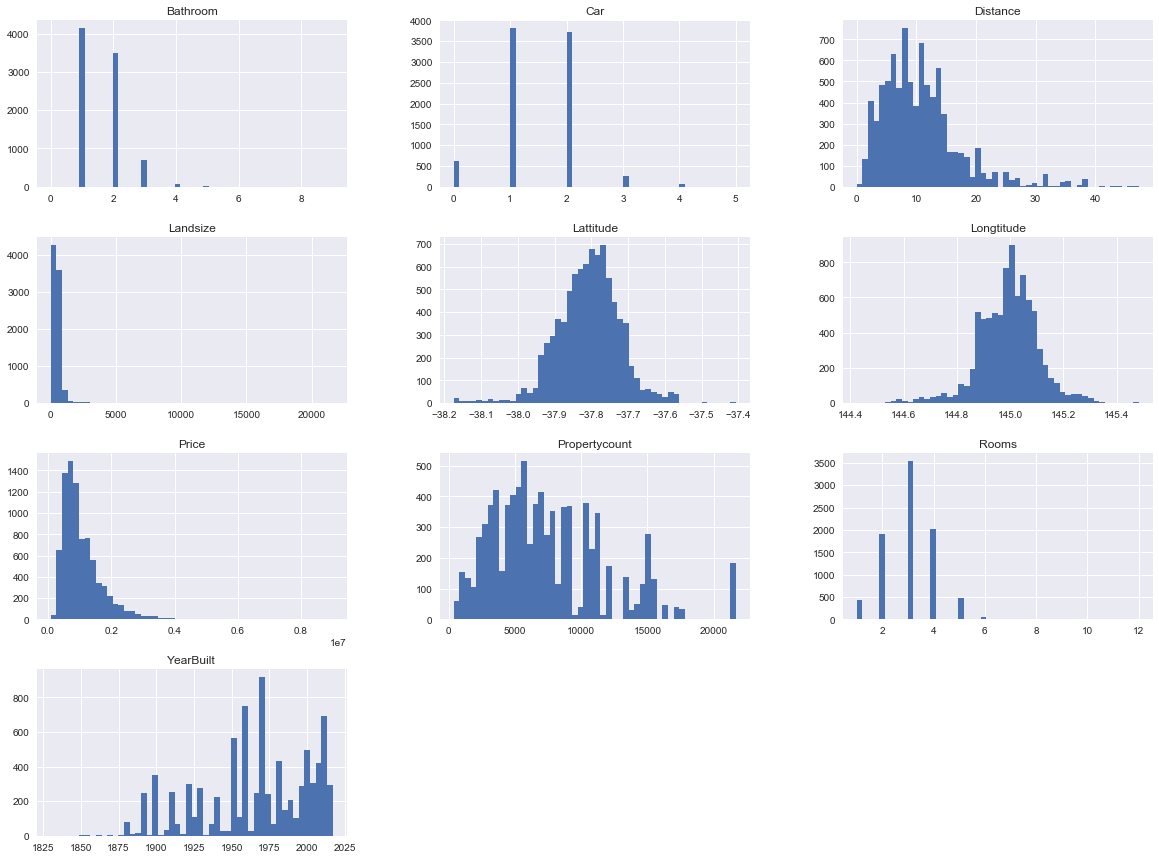

In [43]:
house3.hist(bins=50, figsize=(20,15))
plt.show()

OK it appear there are outliers in numerous of the columns. How can a building area be 0? 
Also, Bedrooms2, which was scraped from a separate source, is higher than total rooms in some cases. Same with bathrooms
Ands it is possible to have 2 rooms but 18 car spaces? 
This might not be the best approach, but I am going to remove and rows that contain a column with values that fall within 3 srtandard deviations from the mean (99percentile)

dropping bed2 but keeping bathroom for now. 

In [44]:
house3.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount
count,8455.000000,8.455000e+03,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000
mean,3.049911,1.076179e+06,10.661644,1.625310,1.450976,489.560142,1965.713779,-37.807684,144.994818,7480.447546
std,0.998280,6.768602e+05,6.507412,0.717732,0.709981,777.294062,36.528964,0.085966,0.112282,4342.195880
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174360,144.423790,389.000000
25%,2.000000,6.225000e+05,6.200000,1.000000,1.000000,176.000000,1945.000000,-37.858100,144.927215,4442.000000
50%,3.000000,8.860000e+05,9.700000,2.000000,1.000000,422.000000,1970.000000,-37.802900,144.999670,6567.000000
75%,4.000000,1.330000e+06,13.700000,2.000000,2.000000,648.000000,2000.000000,-37.754900,145.062425,10331.000000
max,12.000000,9.000000e+06,47.300000,9.000000,5.000000,21600.000000,2017.000000,-37.407200,145.482730,21650.000000


In [45]:
house3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8455 entries, 2 to 31413
Data columns (total 12 columns):
Rooms            8455 non-null int64
Type             8455 non-null object
Price            8455 non-null float64
Method           8455 non-null object
Distance         8455 non-null float64
Bathroom         8455 non-null float64
Car              8455 non-null float64
Landsize         8455 non-null float64
YearBuilt        8455 non-null float64
Lattitude        8455 non-null float64
Longtitude       8455 non-null float64
Propertycount    8455 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 858.7+ KB


In [46]:
# # #make year an indicator
# house3['YearBuiltInd'] = np.where(house3.YearBuilt == 1970,1,0)
# # house3['RoomInd'] = np.where(house3.Rooms >3,1,0)
# # house3['BathInd'] = np.where(house3.Bathroom >2,1,0)
# # house3['CarInd'] = np.where(house3.Car>1,1,0)




# house3 = house3.drop(['YearBuilt'],1)

C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


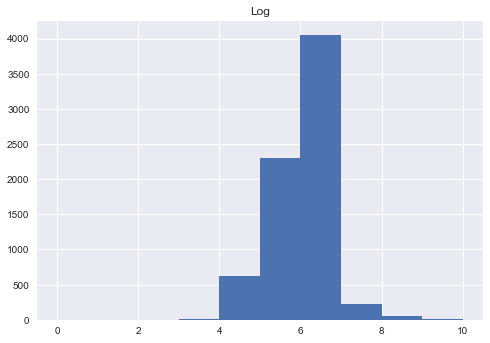

In [47]:
#maybe we should transoform Price
plt.hist(np.log(house3['Landsize'].dropna()),range=(0,10))
plt.title('Log')

In [364]:
# house3['log_landsize']= np.log(house3['Landsize'].dropna())

In [48]:
house3 = house3.drop(['Propertycount'],1)
house3 = house3.drop(['Landsize'],1)

In [49]:
corrmat = house3.corr()

corrmat['Price'].sort_values(ascending=False)

Price         1.000000
Rooms         0.509473
Bathroom      0.493613
Car           0.302231
Longtitude    0.202649
Distance     -0.186863
Lattitude    -0.213600
YearBuilt    -0.330555
Name: Price, dtype: float64

In [51]:
# #going to create dummies for my categorical variables
# #first convert the floats to oject
# house3['Car'] = house3['Car'].astype(str)
# house3['Rooms'] = house3['Rooms'].astype(str)
# house3['Bathroom'] = house3['Bathroom'].astype(str)

house_dummies = pd.get_dummies(house3[['Type','Method']])
features = pd.concat([house_dummies, house3], axis=1, join_axes=[house_dummies.index])

In [52]:
features = features.drop(['Type','Method'],1)

In [53]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8455 entries, 2 to 31413
Data columns (total 16 columns):
Type_h        8455 non-null uint8
Type_t        8455 non-null uint8
Type_u        8455 non-null uint8
Method_PI     8455 non-null uint8
Method_S      8455 non-null uint8
Method_SA     8455 non-null uint8
Method_SP     8455 non-null uint8
Method_VB     8455 non-null uint8
Rooms         8455 non-null int64
Price         8455 non-null float64
Distance      8455 non-null float64
Bathroom      8455 non-null float64
Car           8455 non-null float64
YearBuilt     8455 non-null float64
Lattitude     8455 non-null float64
Longtitude    8455 non-null float64
dtypes: float64(7), int64(1), uint8(8)
memory usage: 660.5 KB


In [54]:

features = features.drop(['Price'],1)


# Select only numeric variables to scale.
df_num = features.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the correct column names.
feats_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names, index=features.index)

feats_scaled['Price'] = house3['Price']

## Model Time - Lets start with Lasso (lots of features)

In [55]:
X = feats_scaled.drop(['Price'], axis=1, inplace=False)
# Dependent variable
Y = feats_scaled['Price']

from sklearn.model_selection import train_test_split
from sklearn import model_selection

# X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 

In [56]:
# Declare a logistic regression classifier.
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)

# print(pd.crosstab(Y_pred, Y_test))

print('\nThe accuracy for train set: ',format(reg.score(X_train, Y_train)))
print('The accuracy for test set: ',format(reg.score(X_test, Y_test)))


The accuracy for train set:  0.5996379724847589
The accuracy for test set:  0.573218245243814


In [57]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestRegressor()
# X = feats_scaled.drop(['ArrDelayInd'], axis=1, inplace=False)
# Dependent variable
# Y = feats_scaled['ArrDelayInd']
X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 

rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

# print('\n RF Accuracy by ArrDelayInd')
# print(pd.crosstab(Y_pred, Y_test))

print("\nAccuracy on training set: {:.3f}".format(rfc.score(X_train, Y_train)))
print("\nAccuracy on test set: {:.3f}".format(rfc.score(X_test, Y_test)))


rfc_score = cross_val_score(rfc, X, Y, cv=5)
print('\nEach Cross Validated R2 score: \n', rfc_score)
print("\nOverall Random Forest Regression R2: %0.2f (+/- %0.2f)\n" % (rfc_score.mean(), rfc_score.std() * 2))


Accuracy on training set: 0.956

Accuracy on test set: 0.728

Each Cross Validated R2 score: 
 [ 0.73114877  0.70802998  0.72698865  0.66725667  0.74709243]

Overall Random Forest Regression R2: 0.72 (+/- 0.05)

